# CSE 4334 Assignment 2
## K-Nearest Neighbor
### By Chesley Cecil
### ID 1001611979

Loading the iris dataset and splitting the data into 60% training, 20% development, and 20% testing

In [1]:
%matplotlib inline

#Allows the iris dataset to be loaded
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

#Loads the iris dataset
iris = datasets.load_iris()

#Extracts the attributes and class labels from the iris dataset
attributes = iris.data
labels = iris.target

#Merges the attributes and class labels
data = np.insert(attributes, 4, labels, axis=1)

print("Iris dataset:")
print(data)

#Creates an array of booleans where about 60% of the values are True
data_bool = [np.random.randint(1, 10) <= 6 for i in range(len(data))]

#Extracts the training data
training_data = data[data_bool]

#Extracts the data that wasn't used for training
data = data[np.invert(data_bool)]

#Creates an array of booleans where about 50% of the values are True
data_bool = [np.random.randint(1, 10) <= 5 for i in range(len(data))]

#Extracts the development data
development_data = data[data_bool]

#Extracts the test data
test_data = data[np.invert(data_bool)]

#Specifies the possible k values
k_values = [1, 3, 5, 7]

#Gets the size of the development dataset
development_size = development_data.shape[0]

#Gets the size of the test dataset
test_size = test_data.shape[0]

#Euclidian
def euclidian_dist(test_point, training_data):
    #Cuts off the class label from the data
    a = training_data[:, :-1]
    
    #Subtracts the values of the test point
    a = a - test_point
    
    #Gets the magnitude of each row of a
    #Since the magnitude is the distance from zero
    #and a was already adjusted by b, the magnitude
    #is the distance between each row of a and b
    a = np.linalg.norm(a, axis=1)
    
    #Manually reshapes a so the class labels can be added back
    a = a.reshape((a.shape[0], 1))
    
    #Adds back in the class labels
    a = np.insert(a, 1, training_data[:, -1], axis=1)

    #Sorts the data by the distance
    a = a[np.argsort(a[:, 0])]
    
    return a

#Normalized Euclidian
def norm_euclidian_dist(test_point, training_data):
    #Cuts off the class label from the data
    a = training_data[:, :-1]
    
    a = (a - np.tile(a.mean(axis=1), (4, 1)).T) / np.tile(a.std(axis=1), (4, 1)).T
    b = (test_point - test_point.mean()) / test_point.std()
    
    #Subtracts the values of the test point
    a = a - b
    
    #Gets the magnitude of each row of a
    #Since the magnitude is the distance from zero
    #and a was already adjusted by b, the magnitude
    #is the distance between each row of a and b
    a = np.linalg.norm(a, axis=1)
    
    #Manually reshapes a so the class labels can be added back
    a = a.reshape((a.shape[0], 1))
    
    #Adds back in the class labels
    a = np.insert(a, 1, training_data[:, -1], axis=1)
    
    #Sorts the data by the distance
    a = a[np.argsort(a[:, 0])]
    
    return a

#Cosine Similarity
def cosine_similarity(test_point, training_data):
    #Cuts off the class label from the data
    a = training_data[:, :-1]
    
    #Calculates the cosine similarity between each row of a and the test point
    a = np.dot(a, test_point) / (np.linalg.norm(a, axis=1) * np.linalg.norm(test_point))
    
    #Manually reshapes a so the class labels can be added back
    a = a.reshape((a.shape[0], 1))
    
    #Turns all of the cosine similarities into their reciprocals so "closer to 0"
    #can be used to find the smaller distance instead of "closer to 1"
    #While the method doesn't work if an element is 0, none of the data points
    #are orthogonal, so the cosine similarity will never be 0
    a = np.reciprocal(a)
    
    #Adds back in the class labels
    a = np.insert(a, 1, training_data[:, -1], axis=1)
    
    #Sorts the data by the distance
    a = a[np.argsort(a[:, 0])]
    
    return a

def mode(data):
    return np.bincount(data).argmax()

Iris dataset:
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.6 1.4 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0.

Testing various values of K for the euclidian distance metric, and finding the best one

The best accuracy is 1.0 for k = 7


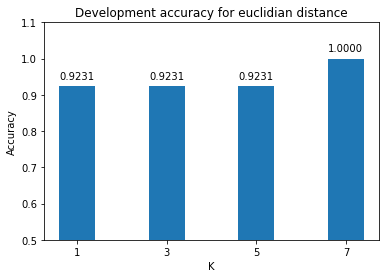

In [2]:
#Euclidian distance

#Calculates the euclidian distance between every development data point and the training data
#creating a 3D array where the ith element is the result of running euclidian_dist with the
#ith element of development_data
euc = np.apply_along_axis(euclidian_dist, 1, development_data[:, :-1], training_data)

accuracy = []

for i in k_values:
    #Calculates the accuracy of the classifier for the given k value
    #First, the class labels are extracted from the first i rows of euc, and converted into ints
    #Next, the most frequently occuring class label is extracted and tested for equality against
    #the expected class label
    #Finally, the equality values are summed, and divided against the number of elements in the develoment dataset
    #Note: since True and False alias as 1 and 0, the sum is equal to the number of True values
    accuracy.append(np.sum(((np.apply_along_axis(mode, 1, euc[:, :i, 1].astype(int))) - development_data[:, -1]) == 0)
                    / development_size)

best_k_euc = np.argmax(accuracy)

print("The best accuracy is", accuracy[best_k_euc], "for k =", k_values[best_k_euc])

plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
plt.xlabel("K")
plt.xticks(k_values)
plt.title("Development accuracy for euclidian distance")

for index, value in enumerate(accuracy):
    plt.text(index * 2 + 0.6, value + 0.02, "{v:.4f}".format(v=value))
    
plt.bar(k_values, accuracy)
plt.show()

Testing various values of K for the normalized euclidian distance metric, and finding the best one

The best accuracy is 0.9615384615384616 for k = 3


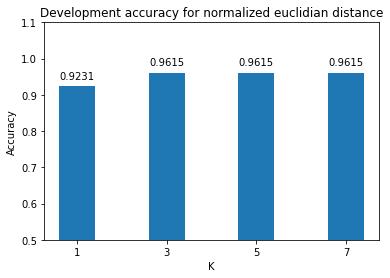

In [3]:
#Normalized euclidian distance

#Calculates the normalized euclidian distance between every development data point and the training data
#creating a 3D array where the ith element is the result of running norm_euclidian_dist with the
#ith element of development_data
norm_euc = np.apply_along_axis(norm_euclidian_dist, 1, development_data[:, :-1], training_data)

accuracy = []

for i in k_values:
    #Calculates the accuracy of the classifier for the given k value
    #First, the class labels are extracted from the first i rows of euc, and converted into ints
    #Next, the most frequently occuring class label is extracted and tested for equality against
    #the expected class label
    #Finally, the equality values are summed, and divided against the number of elements in the develoment dataset
    #Note: since True and False alias as 1 and 0, the sum is equal to the number of True values
    accuracy.append(np.sum(((np.apply_along_axis(mode, 1, norm_euc[:, :i, 1].astype(int))) - development_data[:, -1]) == 0)
                    / development_size)

best_k_norm_euc = np.argmax(accuracy)

print("The best accuracy is", accuracy[best_k_norm_euc], "for k =", k_values[best_k_norm_euc])

plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
plt.xlabel("K")
plt.xticks(k_values)
plt.title("Development accuracy for normalized euclidian distance")

for index, value in enumerate(accuracy):
    plt.text(index * 2 + 0.6, value + 0.02, "{v:.4f}".format(v=value))
    
plt.bar(k_values, accuracy)
plt.show()

Testing various values of K for the cosine similarity metric, and finding the best one

The best accuracy is 0.9230769230769231 for k = 3


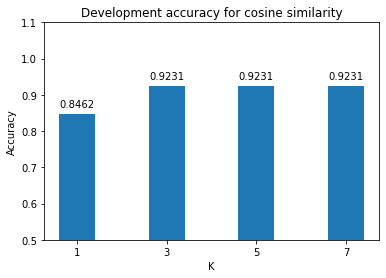

In [4]:
#Cosine similarity

#Calculates the cosine similarity between every development data point and the training data
#creating a 3D array where the ith element is the result of running cosine_similarity with the
#ith element of development_data
cos_sim = np.apply_along_axis(cosine_similarity, 1, development_data[:, :-1], training_data)

accuracy = []

for i in k_values:
    #Calculates the accuracy of the classifier for the given k value
    #First, the class labels are extracted from the first i rows of euc, and converted into ints
    #Next, the most frequently occuring class label is extracted and tested for equality against
    #the expected class label
    #Finally, the equality values are summed, and divided against the number of elements in the develoment dataset
    #Note: since True and False alias as 1 and 0, the sum is equal to the number of True values
    accuracy.append(np.sum(((np.apply_along_axis(mode, 1, cos_sim[:, :i, 1].astype(int))) - development_data[:, -1]) == 0)
                    / development_size)

best_k_cos_sim = np.argmax(accuracy)

print("The best accuracy is", accuracy[best_k_cos_sim], "for k =", k_values[best_k_cos_sim])

plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
plt.xlabel("K")
plt.xticks(k_values)
plt.title("Development accuracy for cosine similarity")

for index, value in enumerate(accuracy):
    plt.text(index * 2 + 0.6, value + 0.02, "{v:.4f}".format(v=value))
    
plt.bar(k_values, accuracy)
plt.show()

Testing the different distance metrics using the best K value for them

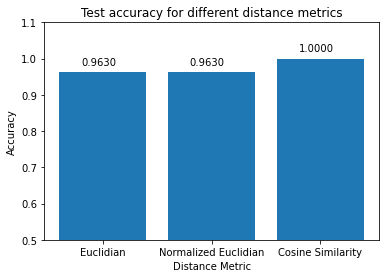

In [5]:
#Calculates the euclidian distance between every development data point and the training data
euc = np.apply_along_axis(euclidian_dist, 1, test_data[:, :-1], training_data)

accuracy = []

#Calculates the accuracy of the classifier using euclidian distance for the given k value
accuracy.append(np.sum(((np.apply_along_axis(mode, 1, euc[:, :k_values[best_k_euc], 1].astype(int))) - test_data[:, -1]) == 0)
                    / test_size)

#Calculates the normalized euclidian distance between every development data point and the training data
norm_euc = np.apply_along_axis(norm_euclidian_dist, 1, test_data[:, :-1], training_data)

#Calculates the accuracy of the classifier using normalized euclidian distance for the given k value
accuracy.append(np.sum(((np.apply_along_axis(mode, 1, norm_euc[:, :k_values[best_k_norm_euc], 1].astype(int))) - test_data[:, -1]) == 0)
                    / test_size)

#Calculates the cosine similarity between every development data point and the training data
cos_sim = np.apply_along_axis(cosine_similarity, 1, test_data[:, :-1], training_data)

#Calculates the accuracy of the classifier using cosine similarity for the given k value
accuracy.append(np.sum(((np.apply_along_axis(mode, 1, cos_sim[:, :k_values[best_k_cos_sim], 1].astype(int))) - test_data[:, -1]) == 0)
                    / test_size)

plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)
plt.xlabel("Distance Metric")
plt.title("Test accuracy for different distance metrics")

for index, value in enumerate(accuracy):
    plt.text(index - 0.2, value + 0.02, "{v:.4f}".format(v=value))
    
plt.bar(["Euclidian", "Normalized Euclidian", "Cosine Similarity"], accuracy)
plt.show()